##  THE DATA

### The dataframe contains data on 7032 costumers of a telephone company, it contains their payment plan and information and most importantly, if they churned. Churn means to discontinue the service. This project contains 2 parts: Exploratory Data Analysis and Machine Learning

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('Telco-Customer-Churn.csv')

In [3]:
df.head()

customerID  gender  SeniorCitizen Partner Dependents  tenure PhoneService  \
0  7590-VHVEG  Female              0     Yes         No       1           No   
1  5575-GNVDE    Male              0      No         No      34          Yes   
2  3668-QPYBK    Male              0      No         No       2          Yes   
3  7795-CFOCW    Male              0      No         No      45           No   
4  9237-HQITU  Female              0      No         No       2          Yes   

      MultipleLines InternetService OnlineSecurity  ... DeviceProtection  \
0  No phone service             DSL             No  ...               No   
1                No             DSL            Yes  ...              Yes   
2                No             DSL            Yes  ...               No   
3  No phone service             DSL            Yes  ...              Yes   
4                No     Fiber optic             No  ...               No   

  TechSupport StreamingTV StreamingMovies        Contract PaperlessBilling  \
0          No          No              No  Month-to-month              Yes   
1          No          No              No        One year               No   
2          No          No              No  Month-to-month              Yes   
3         Yes          No              No        One year               No   
4          No          No              No  Month-to-month              Yes   

               PaymentMethod MonthlyCharges  TotalCharges  Churn  
0           Electronic check          29.85         29.85     No  
1               Mailed check          56.95       1889.50     No  
2               Mailed check          53.85        108.15    Yes  
3  Bank transfer (automatic)          42.30       1840.75     No  
4           Electronic check          70.70        151.65    Yes  

[5 rows x 21 columns]

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7032 entries, 0 to 7031
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7032 non-null   object 
 1   gender            7032 non-null   object 
 2   SeniorCitizen     7032 non-null   int64  
 3   Partner           7032 non-null   object 
 4   Dependents        7032 non-null   object 
 5   tenure            7032 non-null   int64  
 6   PhoneService      7032 non-null   object 
 7   MultipleLines     7032 non-null   object 
 8   InternetService   7032 non-null   object 
 9   OnlineSecurity    7032 non-null   object 
 10  OnlineBackup      7032 non-null   object 
 11  DeviceProtection  7032 non-null   object 
 12  TechSupport       7032 non-null   object 
 13  StreamingTV       7032 non-null   object 
 14  StreamingMovies   7032 non-null   object 
 15  Contract          7032 non-null   object 
 16  PaperlessBilling  7032 non-null   object 


## PART 1: EXPLORATORY DATA ANALYSIS

#### Checking for missing values

In [5]:
df.isnull().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

In [6]:
df.describe()

SeniorCitizen       tenure  MonthlyCharges  TotalCharges
count    7032.000000  7032.000000     7032.000000   7032.000000
mean        0.162400    32.421786       64.798208   2283.300441
std         0.368844    24.545260       30.085974   2266.771362
min         0.000000     1.000000       18.250000     18.800000
25%         0.000000     9.000000       35.587500    401.450000
50%         0.000000    29.000000       70.350000   1397.475000
75%         0.000000    55.000000       89.862500   3794.737500
max         1.000000    72.000000      118.750000   8684.800000

In [7]:
df.columns

Index(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')

#### Exploring the Churn column

In [8]:
df['Churn'].value_counts()

No     5163
Yes    1869
Name: Churn, dtype: int64

<AxesSubplot:xlabel='Churn', ylabel='count'>

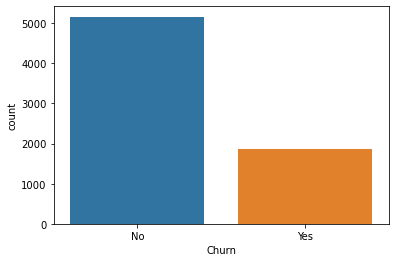

In [9]:
sns.countplot(x=df['Churn'])

### Exploring payment method column

In [10]:
df['PaymentMethod'].unique()

array(['Electronic check', 'Mailed check', 'Bank transfer (automatic)',
       'Credit card (automatic)'], dtype=object)

<AxesSubplot:xlabel='PaymentMethod', ylabel='count'>

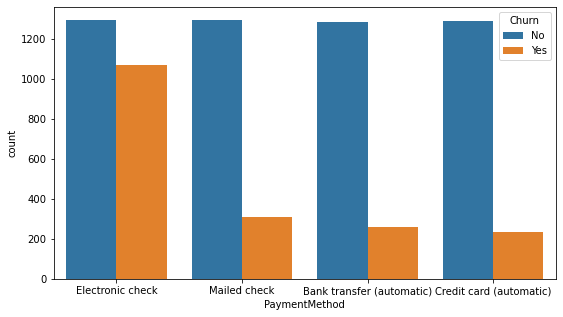

In [11]:
plt.figure(figsize=(9,5))
sns.countplot(x=df['PaymentMethod'],hue=df['Churn'])

#### From the above plot, we can see that those who pay with electronic checks seem to be far more likely to churn

#### Creating a dataframe of only those who paid with electronic check to take a deeper look

In [12]:
Electronic_check_df = df[df['PaymentMethod']=='Electronic check']

In [13]:
Electronic_check_df['Churn'].value_counts()

No     1294
Yes    1071
Name: Churn, dtype: int64

In [14]:
df.describe().transpose()['mean'][['MonthlyCharges','TotalCharges']]

MonthlyCharges      64.798208
TotalCharges      2283.300441
Name: mean, dtype: float64

In [15]:
Electronic_check_df.describe().transpose()['mean'][['MonthlyCharges','TotalCharges']]

MonthlyCharges      76.255814
TotalCharges      2090.868182
Name: mean, dtype: float64

#### Those who pay with electronic checks seem to have a significantly higher monthly charge even though they have  lower total charges

#### Creating a function that returns the percentage of costumers that churned using a particular payment type

In [16]:
def perc_churned(df,payment):
    count=0
    for row in range(0,len(df)):
        if df['PaymentMethod'][row]==payment and df['Churn'][row] == 'Yes':
            count = count+1
            percentage = 100* (count/len(df))
    print(percentage)

In [17]:
perc_churned(df,'Electronic check')

15.23037542662116


In [18]:
perc_churned(df,'Mailed check')

4.379977246871445


In [19]:
perc_churned(df,'Credit card (automatic)')

3.299203640500569


In [20]:
perc_churned(df,'Bank transfer (automatic)')

3.668941979522184


#### From the above we can see that the percentage of those who churnd using the Electric check payment method (15) is much higher than the percentages of other payment methods(3-4)

### Exploring contract column

In [21]:
df['Contract'].value_counts()

Month-to-month    3875
Two year          1685
One year          1472
Name: Contract, dtype: int64

<AxesSubplot:xlabel='Contract', ylabel='count'>

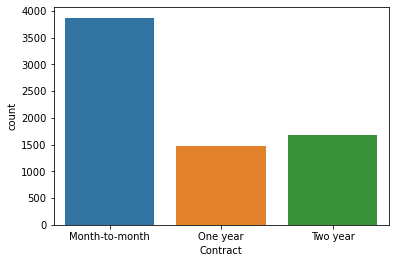

In [22]:
sns.countplot(x='Contract',data=df)

<AxesSubplot:xlabel='Contract', ylabel='count'>

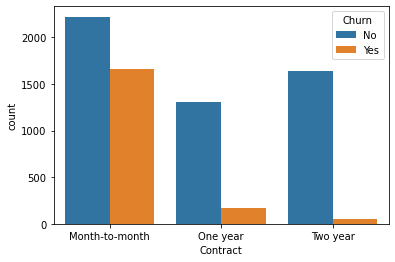

In [23]:
sns.countplot(data=df,x='Contract',hue='Churn')

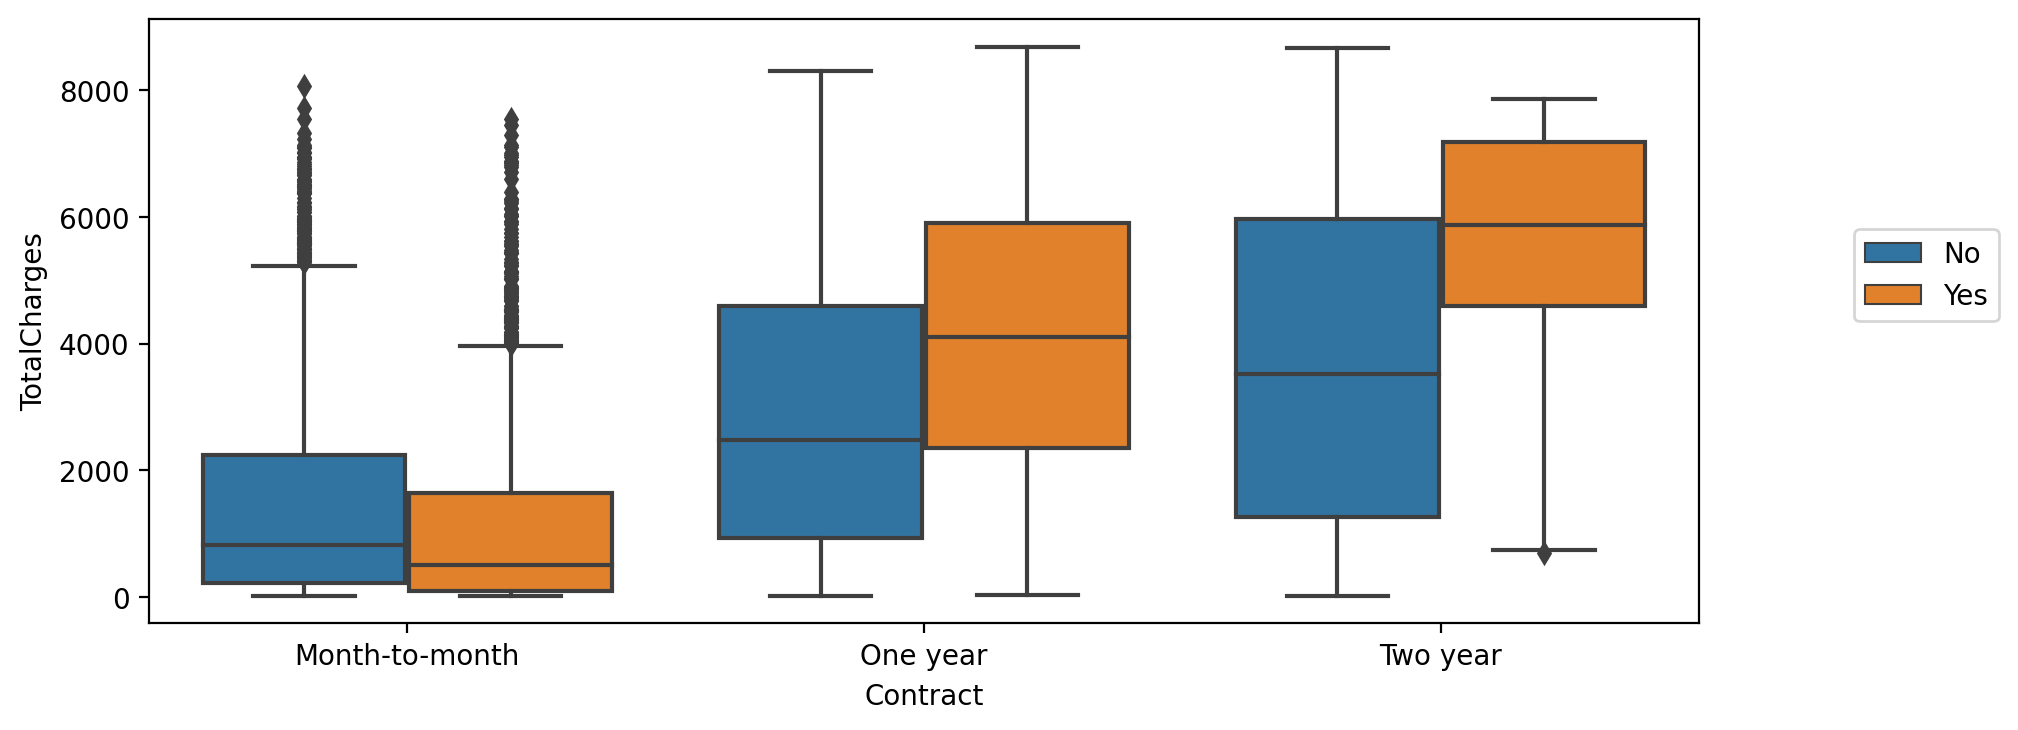

In [24]:
plt.figure(figsize=(10,4),dpi=200)
sns.boxplot(data=df,y='TotalCharges',x='Contract',hue='Churn')
plt.legend(loc=(1.1,0.5))

#### There are more month-to-month costumers and they are more likely to churn compared with longer payment plans like one or two years. The longer the contract, the lower the likelihood of churning

### Exploring the tenure column

In [25]:
df['tenure']

0        1
1       34
2        2
3       45
4        2
        ..
7027    24
7028    72
7029    11
7030     4
7031    66
Name: tenure, Length: 7032, dtype: int64

#### Using a function to group tenure based on the number of months

In [26]:
def cohort(tenure):
    if tenure<13:
        return '0-12 Months'
    elif tenure<25:
        return '12-24 Months'
    elif tenure <49:
        return '24-48 Months'
    else:
        return 'Over 48 Months'

#### Based on the tenure column values, creating a new column called Tenure Cohort that creates 4 separate categories

In [27]:
df['Tenure Cohort'] = df['tenure'].apply(cohort)

In [28]:
df[['Tenure Cohort','tenure']]

Tenure Cohort  tenure
0        0-12 Months       1
1       24-48 Months      34
2        0-12 Months       2
3       24-48 Months      45
4        0-12 Months       2
...              ...     ...
7027    12-24 Months      24
7028  Over 48 Months      72
7029     0-12 Months      11
7030     0-12 Months       4
7031  Over 48 Months      66

[7032 rows x 2 columns]

<AxesSubplot:xlabel='Tenure Cohort', ylabel='count'>

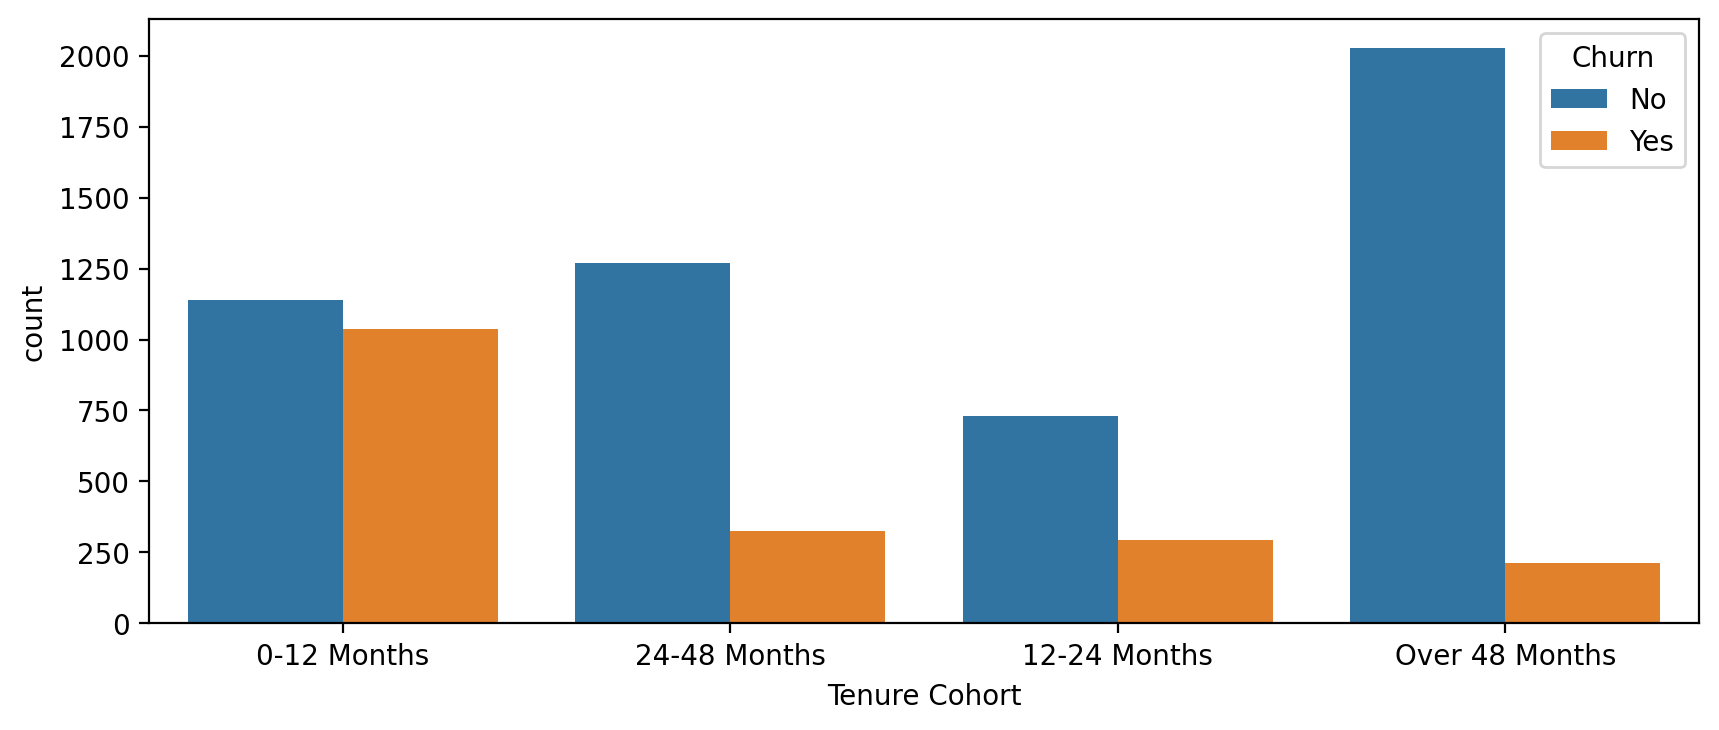

In [29]:
plt.figure(figsize=(10,4),dpi=200)
sns.countplot(data=df,x='Tenure Cohort',hue='Churn')

<AxesSubplot:xlabel='MonthlyCharges', ylabel='TotalCharges'>

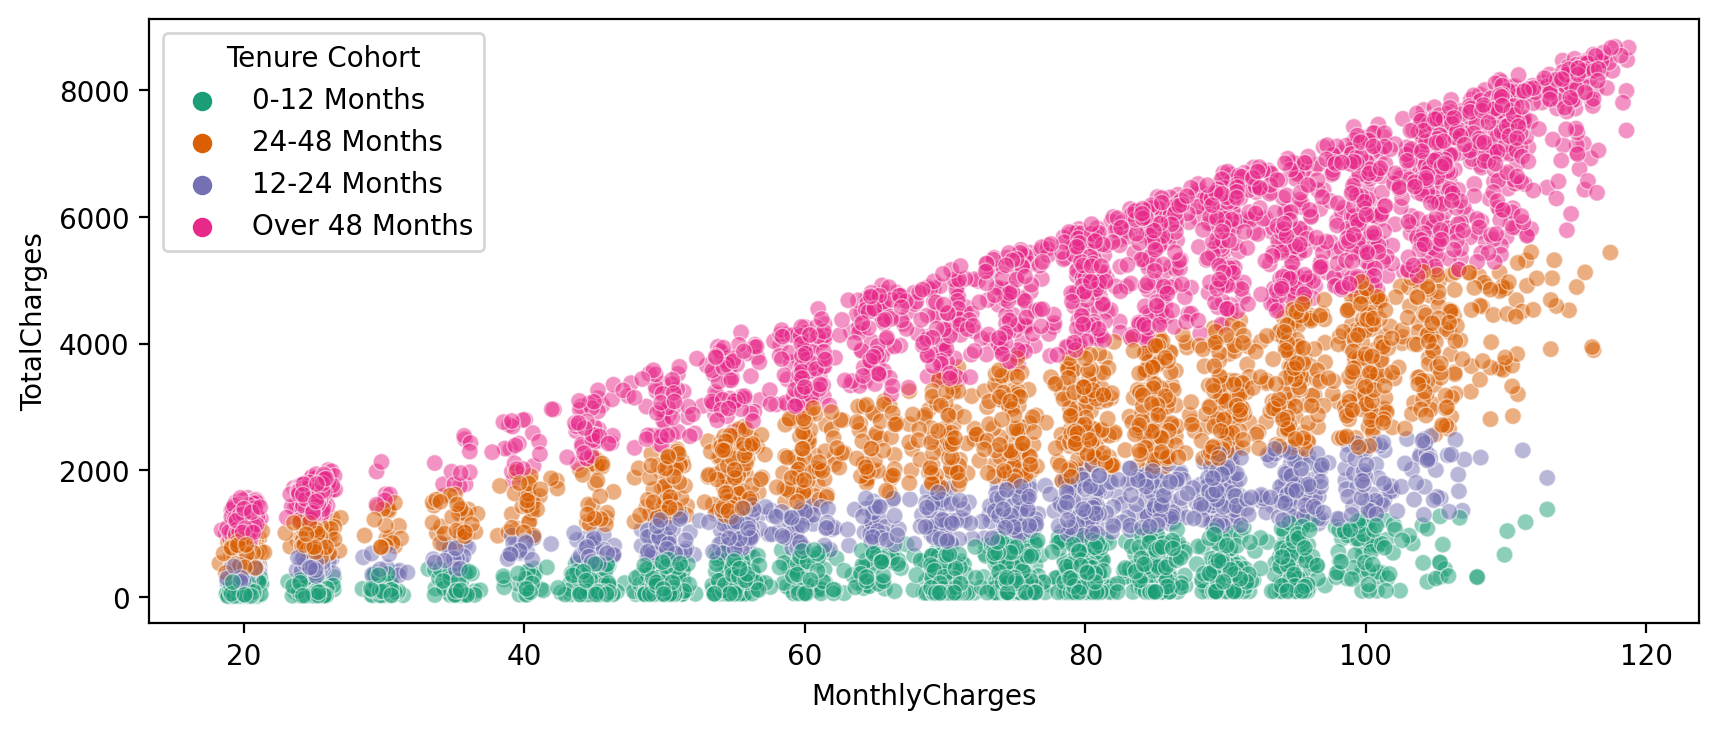

In [30]:
plt.figure(figsize=(10,4),dpi=200)
sns.scatterplot(data=df,x='MonthlyCharges',y='TotalCharges',hue='Tenure Cohort', linewidth=0.5,alpha=0.5,palette='Dark2')

#### The plot above shows that the longer a costumer has used the service and the more the monthly charges, the higher the total charges

### Exploring internet service column

In [31]:
df['InternetService'].value_counts()


Fiber optic    3096
DSL            2416
No             1520
Name: InternetService, dtype: int64

<AxesSubplot:xlabel='InternetService', ylabel='count'>

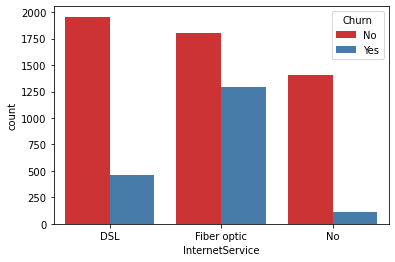

In [32]:
sns.countplot(x=df['InternetService'],hue=df['Churn'],palette='Set1')

#### Those using fiber optics have higher churn rates

# PART 2: MACHINE LEARNING

### Preparing data for ML models

In [33]:
X=df.drop(['Churn','customerID'],axis=1)

In [34]:
X = pd.get_dummies(X,drop_first=True)

In [35]:
y=df['Churn']

In [36]:
X

SeniorCitizen  tenure  MonthlyCharges  TotalCharges  gender_Male  \
0                 0       1           29.85         29.85            0   
1                 0      34           56.95       1889.50            1   
2                 0       2           53.85        108.15            1   
3                 0      45           42.30       1840.75            1   
4                 0       2           70.70        151.65            0   
...             ...     ...             ...           ...          ...   
7027              0      24           84.80       1990.50            1   
7028              0      72          103.20       7362.90            0   
7029              0      11           29.60        346.45            0   
7030              1       4           74.40        306.60            1   
7031              0      66          105.65       6844.50            1   

      Partner_Yes  Dependents_Yes  PhoneService_Yes  \
0               1               0                 0   
1               0               0                 1   
2               0               0                 1   
3               0               0                 0   
4               0               0                 1   
...           ...             ...               ...   
7027            1               1                 1   
7028            1               1                 1   
7029            1               1                 0   
7030            1               0                 1   
7031            0               0                 1   

      MultipleLines_No phone service  MultipleLines_Yes  ...  \
0                                  1                  0  ...   
1                                  0                  0  ...   
2                                  0                  0  ...   
3                                  1                  0  ...   
4                                  0                  0  ...   
...                              ...                ...  ...   
7027                               0                  1  ...   
7028                               0                  1  ...   
7029                               1                  0  ...   
7030                               0                  1  ...   
7031                               0                  0  ...   

      StreamingMovies_Yes  Contract_One year  Contract_Two year  \
0                       0                  0                  0   
1                       0                  1                  0   
2                       0                  0                  0   
3                       0                  1                  0   
4                       0                  0                  0   
...                   ...                ...                ...   
7027                    1                  1                  0   
7028                    1                  1                  0   
7029                    0                  0                  0   
7030                    0                  0                  0   
7031                    1                  0                  1   

      PaperlessBilling_Yes  PaymentMethod_Credit card (automatic)  \
0                        1                                      0   
1                        0                                      0   
2                        1                                      0   
3                        0                                      0   
4                        1                                      0   
...                    ...                                    ...   
7027                     1                                      0   
7028                     1                                      1   
7029                     1                                      0   
7030                     1                                      0   
7031                     1                                      0   

      PaymentMethod_Electronic check  PaymentMethod_M

In [37]:
y

0        No
1        No
2       Yes
3        No
4       Yes
       ... 
7027     No
7028     No
7029     No
7030    Yes
7031     No
Name: Churn, Length: 7032, dtype: object

#### Performing train-test split and scaling data

In [38]:
from sklearn.model_selection import train_test_split

In [39]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=101)

In [40]:
from sklearn.preprocessing import StandardScaler

In [41]:
scaler = StandardScaler()

In [42]:
scaled_X_train = scaler.fit_transform(X_train)

In [43]:
scaled_X_test = scaler.transform(X_test)

# Testing different Machine Learning algorithms  

## Linear Regression

In [44]:
from sklearn.linear_model import LogisticRegression

In [45]:
from sklearn.model_selection import GridSearchCV

In [46]:
log_model = LogisticRegression(solver='saga',max_iter=1000)

In [47]:
penalty = ['l1','l2','elasticnet']
l1_ratio = np.linspace(0,1,5)
C = np.logspace(0,1,5)

In [48]:
param_grid={'penalty':penalty,'l1_ratio':l1_ratio,'C':C}
log_grid_model = GridSearchCV(log_model,param_grid)

In [ ]:
log_grid_model.fit(scaled_X_train,y_train)

In [50]:
log_grid_model.best_params_

{'C': 1.0, 'l1_ratio': 0.0, 'penalty': 'l1'}

In [51]:
log_grid_model.best_estimator_.get_params()

{'C': 1.0,
 'class_weight': None,
 'dual': False,
 'fit_intercept': True,
 'intercept_scaling': 1,
 'l1_ratio': 0.0,
 'max_iter': 1000,
 'multi_class': 'auto',
 'n_jobs': None,
 'penalty': 'l1',
 'random_state': None,
 'solver': 'saga',
 'tol': 0.0001,
 'verbose': 0,
 'warm_start': False}

In [52]:
from sklearn.metrics import classification_report,plot_confusion_matrix,roc_curve,accuracy_score

### creating a function to report performance of models

In [53]:
def report_model(model):
    y_pred=model.predict(scaled_X_test)
    plot_confusion_matrix(model,scaled_X_test,y_test)
    print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

          No       0.88      0.91      0.89       557
         Yes       0.60      0.53      0.56       147

    accuracy                           0.83       704
   macro avg       0.74      0.72      0.73       704
weighted avg       0.82      0.83      0.82       704



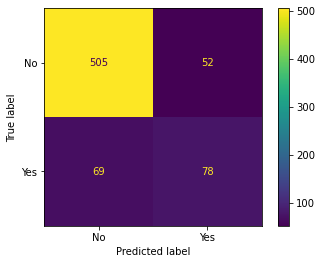

In [54]:
report_model(log_grid_model)

#### Logistic regression model has an accuracy score of 83% and 69 false negatve cases(failed to identify actual churners)

# KNeighbors Classifier

In [55]:
from sklearn.neighbors import KNeighborsClassifier

In [56]:
k_values = list(range(1,20))
knn = KNeighborsClassifier()

In [57]:
param_grid = {'n_neighbors':k_values}

In [58]:
knn_grid_model = GridSearchCV(knn,param_grid,scoring='accuracy')

In [59]:
knn_grid_model.fit(scaled_X_train,y_train)

GridSearchCV(estimator=KNeighborsClassifier(),
             param_grid={'n_neighbors': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12,
                                         13, 14, 15, 16, 17, 18, 19]},
             scoring='accuracy')

In [60]:
knn_grid_model.best_params_

{'n_neighbors': 18}

In [61]:
knn_grid_model.best_estimator_.get_params()

{'algorithm': 'auto',
 'leaf_size': 30,
 'metric': 'minkowski',
 'metric_params': None,
 'n_jobs': None,
 'n_neighbors': 18,
 'p': 2,
 'weights': 'uniform'}

              precision    recall  f1-score   support

          No       0.87      0.89      0.88       557
         Yes       0.56      0.50      0.53       147

    accuracy                           0.81       704
   macro avg       0.71      0.70      0.71       704
weighted avg       0.81      0.81      0.81       704



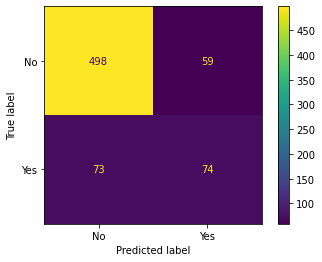

In [62]:
report_model(knn_grid_model)

#### KNN model has an accuracy score of 82% and 70 false negatve cases(failed to identify actual churners)

# Support Vector Classifier

In [63]:
from sklearn.svm import SVC

In [64]:
svc = SVC()

In [65]:
param_grid = {'C':[0.005,0.01,0.03,1],'kernel':['linear','rbf'],'gamma':['scale','auto'],'degree':[2,3]}

In [66]:
svc_grid = GridSearchCV(svc,param_grid)

In [67]:
svc_grid.fit(scaled_X_train,y_train)

GridSearchCV(estimator=SVC(),
             param_grid={'C': [0.005, 0.01, 0.03, 1], 'degree': [2, 3],
                         'gamma': ['scale', 'auto'],
                         'kernel': ['linear', 'rbf']})

In [68]:
svc_grid.best_params_

{'C': 0.005, 'degree': 2, 'gamma': 'scale', 'kernel': 'linear'}

In [69]:
svc_grid.best_estimator_.get_params()

{'C': 0.005,
 'break_ties': False,
 'cache_size': 200,
 'class_weight': None,
 'coef0': 0.0,
 'decision_function_shape': 'ovr',
 'degree': 2,
 'gamma': 'scale',
 'kernel': 'linear',
 'max_iter': -1,
 'probability': False,
 'random_state': None,
 'shrinking': True,
 'tol': 0.001,
 'verbose': False}

              precision    recall  f1-score   support

          No       0.87      0.92      0.89       557
         Yes       0.60      0.46      0.52       147

    accuracy                           0.82       704
   macro avg       0.73      0.69      0.71       704
weighted avg       0.81      0.82      0.81       704



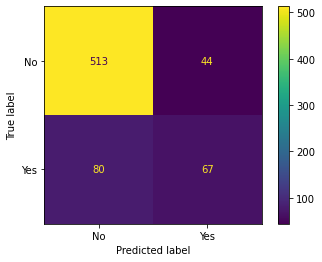

In [70]:
report_model(svc_grid)

#### SVC model has an accuracy score of 82% and 74 false negatve cases(failed to identify actual churners)

In [71]:
from sklearn.tree import DecisionTreeClassifier

In [72]:
dtc = DecisionTreeClassifier()

In [73]:
param_grid = {'criterion':['gini','entropy'],'max_depth':[6,7,8],'max_features':[6,7,8]}

In [74]:
dtc_grid_model = GridSearchCV(dtc,param_grid)

In [75]:
dtc_grid_model.fit(scaled_X_train,y_train)

GridSearchCV(estimator=DecisionTreeClassifier(),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [6, 7, 8], 'max_features': [6, 7, 8]})

In [76]:
dtc_grid_model.best_params_

{'criterion': 'gini', 'max_depth': 6, 'max_features': 8}

              precision    recall  f1-score   support

          No       0.87      0.92      0.89       557
         Yes       0.61      0.49      0.54       147

    accuracy                           0.83       704
   macro avg       0.74      0.70      0.72       704
weighted avg       0.82      0.83      0.82       704



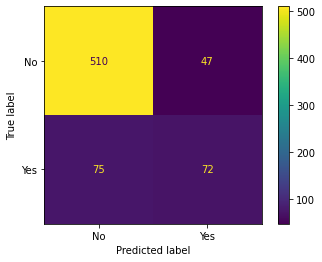

In [77]:
report_model(dtc_grid_model)

#### Decision Tree Classifier model has an accuracy score of 80% and 74 false negatve cases(failed to identify actual churners)

In [78]:
dtc_grid_model.best_estimator_.feature_importances_

array([6.85770610e-03, 4.34935604e-01, 2.41169761e-01, 4.79268498e-02,
       2.28017880e-04, 1.93186183e-03, 4.03888170e-03, 0.00000000e+00,
       3.61686158e-03, 0.00000000e+00, 3.06311164e-02, 2.47461095e-02,
       1.82054196e-02, 8.72488636e-03, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 1.16188026e-03, 0.00000000e+00, 5.51020093e-03,
       0.00000000e+00, 1.64405592e-03, 1.58513908e-02, 0.00000000e+00,
       1.47507658e-02, 2.63984507e-02, 8.08819700e-03, 7.25018602e-05,
       9.96757998e-02, 3.69566641e-05, 9.35555087e-05, 3.70316858e-03,
       0.00000000e+00])

In [79]:
Imp_feat=pd.DataFrame(index=X.columns,data=dtc_grid_model.best_estimator_.feature_importances_,columns=['Feat Importance'])

In [80]:
Imp_feat = Imp_feat[Imp_feat['Feat Importance']>0]

In [81]:
Imp_feat = Imp_feat.sort_values('Feat Importance',ascending=False)

In [82]:
Imp_feat

Feat Importance
tenure                                        0.434936
MonthlyCharges                                0.241170
PaymentMethod_Electronic check                0.099676
TotalCharges                                  0.047927
InternetService_Fiber optic                   0.030631
Contract_Two year                             0.026398
InternetService_No                            0.024746
OnlineSecurity_No internet service            0.018205
StreamingMovies_No internet service           0.015851
Contract_One year                             0.014751
OnlineSecurity_Yes                            0.008725
PaperlessBilling_Yes                          0.008088
SeniorCitizen                                 0.006858
TechSupport_Yes                               0.005510
Dependents_Yes                                0.004039
Tenure Cohort_24-48 Months                    0.003703
MultipleLines_No phone service                0.003617
Partner_Yes                                   0.001932
StreamingTV_Yes                               0.001644
DeviceProtection_Yes                          0.001162
gender_Male                                   0.000228
Tenure Cohort_12-24 Months                    0.000094
PaymentMethod_Credit card (automatic)         0.000073
PaymentMethod_Mailed check                    0.000037

#### These are the most important features in building out the decision tree

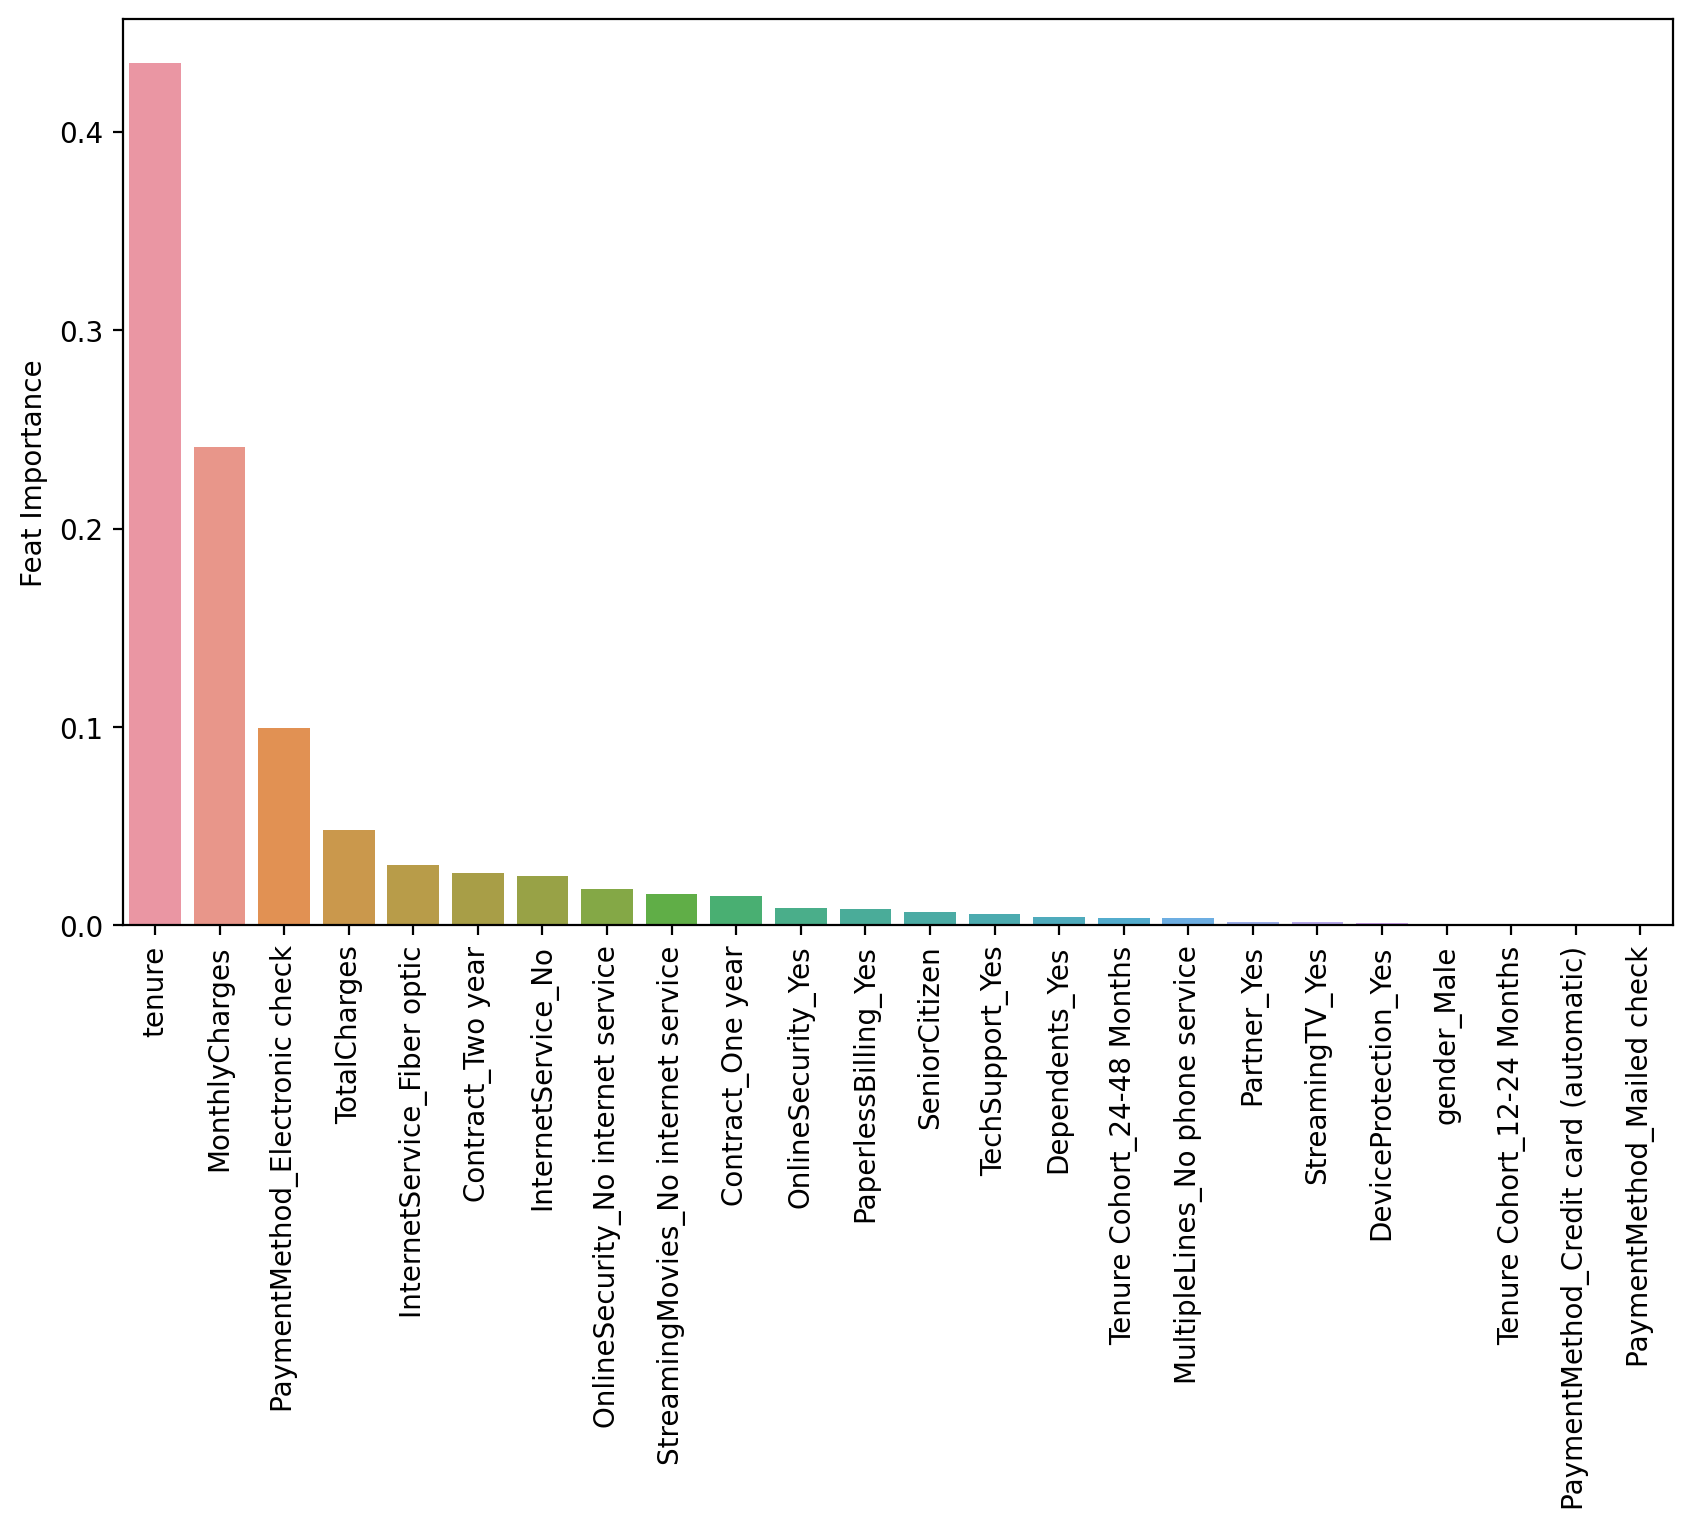

In [83]:
plt.figure(figsize=(10,6),dpi=200)
sns.barplot(data=Imp_feat,x=Imp_feat.index,y='Feat Importance')
plt.xticks(rotation=90);

In [84]:
from sklearn.tree import plot_tree

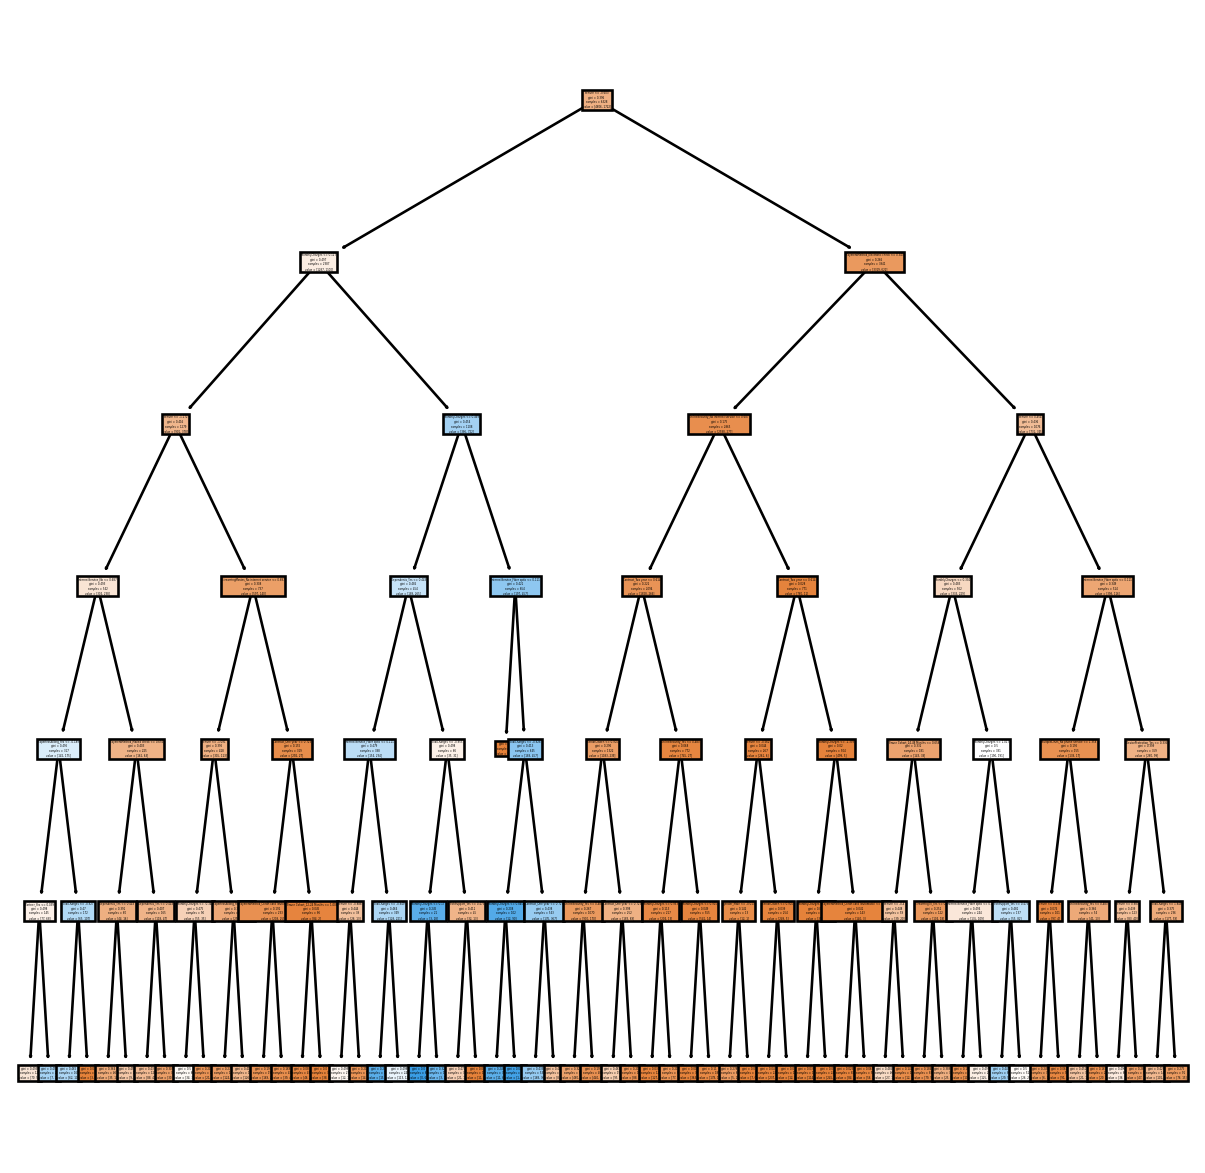

In [85]:
plt.figure(figsize=(8,8),dpi=188)
plot_tree(dtc_grid_model.best_estimator_,filled=True,feature_names=X.columns);

# Random Forest Classifier

In [86]:
from sklearn.ensemble import RandomForestClassifier

In [87]:
rfc = RandomForestClassifier()

In [88]:
param_grid = {'n_estimators':[100,128,192],'bootstrap':[True,False],'max_depth':[8,9,10]}

In [89]:
rfc_grid = GridSearchCV(rfc,param_grid)

In [90]:
rfc_grid.fit(scaled_X_train,y_train)

GridSearchCV(estimator=RandomForestClassifier(),
             param_grid={'bootstrap': [True, False], 'max_depth': [8, 9, 10],
                         'n_estimators': [100, 128, 192]})

In [91]:
rfc_grid.best_params_

{'bootstrap': True, 'max_depth': 8, 'n_estimators': 128}

In [92]:
rfc_grid.best_estimator_.get_params()

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': 8,
 'max_features': 'auto',
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_impurity_split': None,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 128,
 'n_jobs': None,
 'oob_score': False,
 'random_state': None,
 'verbose': 0,
 'warm_start': False}

              precision    recall  f1-score   support

          No       0.87      0.92      0.90       557
         Yes       0.62      0.49      0.55       147

    accuracy                           0.83       704
   macro avg       0.74      0.70      0.72       704
weighted avg       0.82      0.83      0.82       704



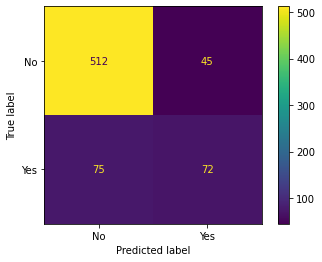

In [93]:
report_model(rfc_grid)

#### Random forest classifier model has an accuracy score of 83% and 77 false negatve cases(failed to identify actual churners)

# Gradient Boosting Model

In [94]:
from sklearn.ensemble import GradientBoostingClassifier,AdaBoostClassifier

In [95]:
gb_model = GradientBoostingClassifier()

In [96]:
param_grid = {'n_estimators':[60,80,100],'learning_rate':[0.1,0.5]}

In [97]:
gb_grid = GridSearchCV(gb_model,param_grid)

In [98]:
gb_grid.fit(scaled_X_train,y_train)

GridSearchCV(estimator=GradientBoostingClassifier(),
             param_grid={'learning_rate': [0.1, 0.5],
                         'n_estimators': [60, 80, 100]})

In [99]:
gb_grid.best_params_

{'learning_rate': 0.1, 'n_estimators': 80}

              precision    recall  f1-score   support

          No       0.88      0.90      0.89       557
         Yes       0.59      0.51      0.55       147

    accuracy                           0.82       704
   macro avg       0.73      0.71      0.72       704
weighted avg       0.81      0.82      0.82       704



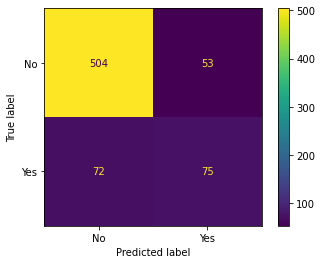

In [100]:
report_model(gb_grid)

#### Random forest classifier model has an accuracy score of 82% and 72 false negatve cases(failed to identify actual churners)

# AdaBoost Classifier

In [101]:
ada_model = AdaBoostClassifier()

In [102]:
param_grid={'learning_rate': [0.5, 1, 2],'n_estimators': [40, 50, 60]}

In [103]:
ada_grid = GridSearchCV(ada_model,param_grid)

In [104]:
ada_grid.fit(scaled_X_train,y_train)

GridSearchCV(estimator=AdaBoostClassifier(),
             param_grid={'learning_rate': [0.5, 1, 2],
                         'n_estimators': [40, 50, 60]})

In [105]:
ada_grid.best_params_

{'learning_rate': 1, 'n_estimators': 50}

              precision    recall  f1-score   support

          No       0.88      0.90      0.89       557
         Yes       0.60      0.54      0.57       147

    accuracy                           0.83       704
   macro avg       0.74      0.72      0.73       704
weighted avg       0.82      0.83      0.83       704



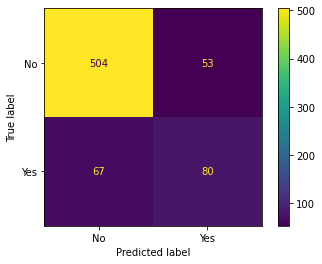

In [106]:
report_model(ada_grid)

#### AdaBoost classifier model has an accuracy score of 83% and 67 false negatve cases(failed to identify actual churners)

## FINAL MODEL

### We are going to choose AdaBoostClassifier algorithm because it had the best reported performance 

In [107]:
final_model = AdaBoostClassifier(learning_rate=1, n_estimators=50)

In [108]:
scaled_X = scaler.fit_transform(X)

In [109]:
final_model.fit(scaled_X,y)

AdaBoostClassifier(learning_rate=1)

In [110]:
import joblib


In [111]:
joblib.dump(final_model,'final_model.pkl')

['final_model.pkl']

In [112]:
joblib.dump(list(X.columns),'column_names.pkl')

['column_names.pkl']